In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Jamboree_Admission.csv")

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
print('Number of Rows   : ',df.shape[0])
print('Number of Columns: ',df.shape[1])

Number of Rows   :  500
Number of Columns:  9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

- There are no missing values in the dataset.

In [7]:
df.duplicated().sum()

0

- There are no duplicate rows in the data too.

'Serial No.' column can be dropped as its only indicating the index of rows.

In [8]:
df.drop(columns = ['Serial No.'], axis=1, inplace = True)

In [9]:
# Observed that the column name of LOR has an extra space character at the end. So, renaming to avoid confusion.

df.rename(columns={'LOR ': 'LOR'},inplace=True)

In [10]:
# Observed that the column name of 'Chance of Admit' has an extra space character at the end. So, renaming to avoid confusion.

df.rename(columns={'Chance of Admit ': 'Chance of Admit'},inplace=True)

### Univariate analysis

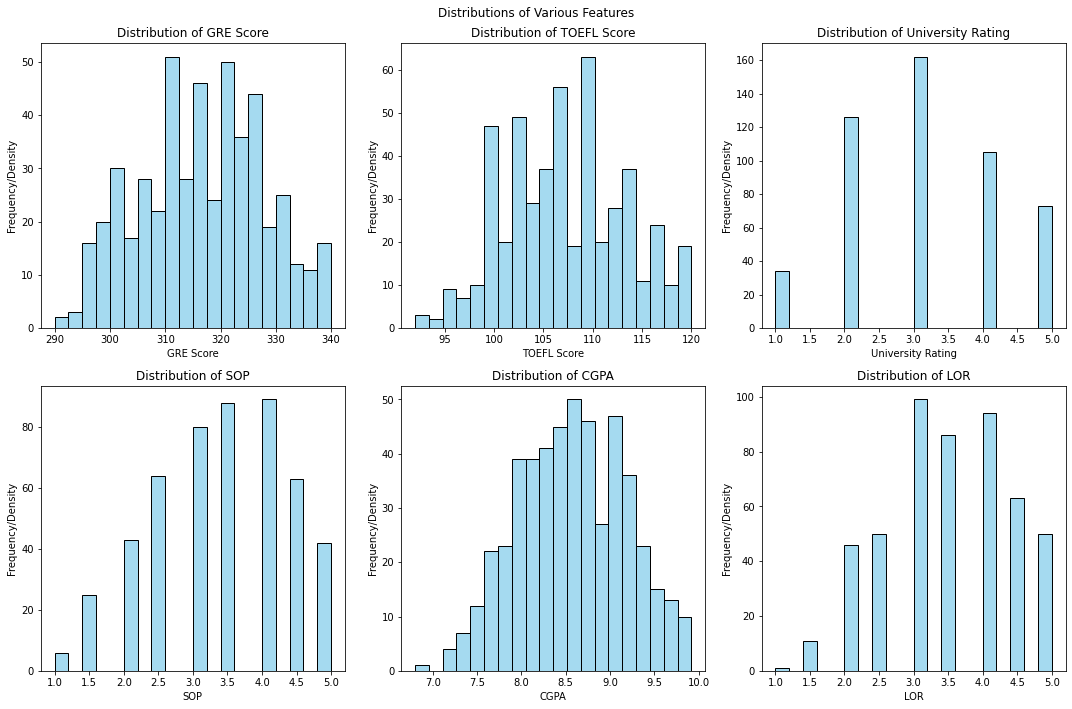

In [11]:
df_columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA', 'LOR']

# Setting up subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Distributions of Various Features")

axes = axes.flatten()

# Plotting each distribution in a subplot
for i, column in enumerate(df_columns):
    sns.histplot(df[column], kde=False, ax=axes[i], color='skyblue', bins=20)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency/Density')

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()

- From the distributions in above plots, it can observed that students with different merits apply for the universities.

### Multivariate analysis

In [12]:
df.groupby('University Rating').agg({
    'GRE Score': 'mean',
    'TOEFL Score': 'mean',
    'SOP': 'mean',
    'CGPA': 'mean',
    'LOR': 'mean'
})


,GRE Score,TOEFL Score,SOP,CGPA,LOR
University Rating,,,,,
1,304.911765,100.205882,1.941176,7.798529,2.426471
2,309.134921,103.444444,2.682540,8.177778,2.956349
3,315.030864,106.314815,3.308642,8.500123,3.401235
4,323.304762,110.961905,4.000000,8.936667,3.947619
5,327.890411,113.438356,4.479452,9.278082,4.404110


- The students with higher means of different scores applied for better universities.
- Mean's of different scores are increasing with the university ratings.

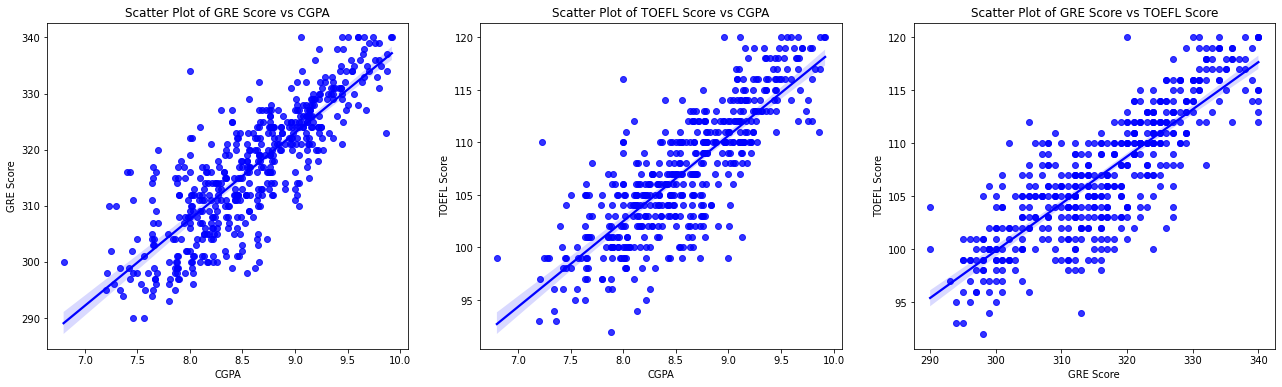

In [13]:
plt.figure(figsize=(22,6))

plt.subplot(1,3,1)
sns.regplot(y='GRE Score', x='CGPA', data=df, color='blue', marker='o')
plt.title('Scatter Plot of GRE Score vs CGPA')

plt.subplot(1,3,2)
sns.regplot(y='TOEFL Score', x='CGPA', data=df, color='blue', marker='o')
plt.title('Scatter Plot of TOEFL Score vs CGPA')

plt.subplot(1,3,3)
sns.regplot(x='GRE Score', y='TOEFL Score', data=df, color='blue', marker='o')
plt.title('Scatter Plot of GRE Score vs TOEFL Score')

plt.show()

- From the above scatter plots it can be observed that the applicants with higher CGPA also has higher GRE and TOEFL scores with some exceptions.

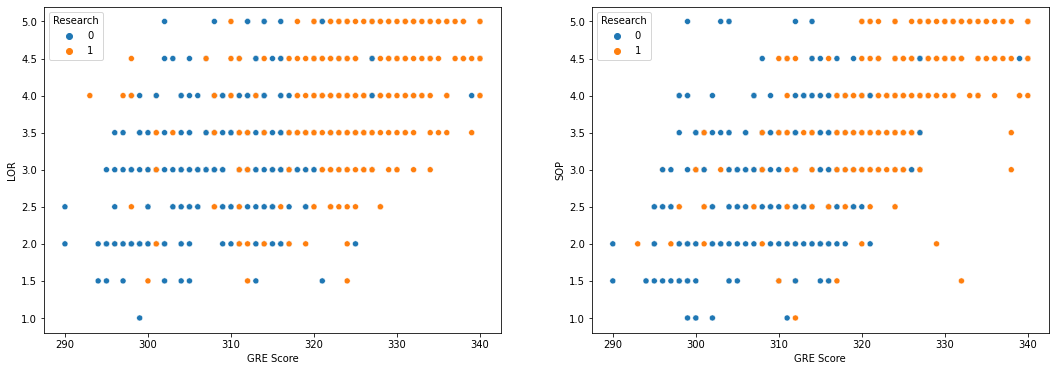

In [14]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.scatterplot(x=df['GRE Score'], y=df['LOR'], hue=df['Research'])

plt.subplot(1,2,2)
sns.scatterplot(x=df['GRE Score'], y=df['SOP'], hue=df['Research'])

plt.show()

- From the above scatter plots it can be obsesrved that there is not much of a relation between GRE Score with LOR and SOP scores.

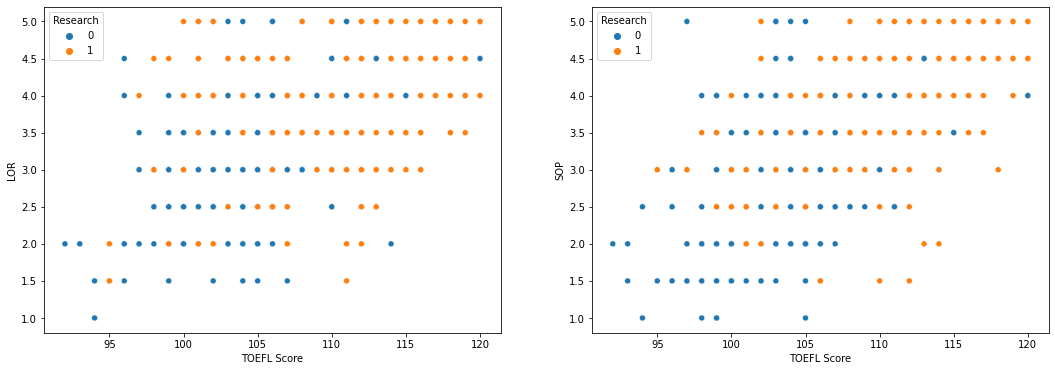

In [15]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.scatterplot(x=df['TOEFL Score'], y=df['LOR'], hue=df['Research'])

plt.subplot(1,2,2)
sns.scatterplot(x=df['TOEFL Score'], y=df['SOP'], hue=df['Research'])

plt.show()

- From the above scatter plots it can be obsesrved that there is not much of a relation between TOEFL Score with LOR and SOP scores.

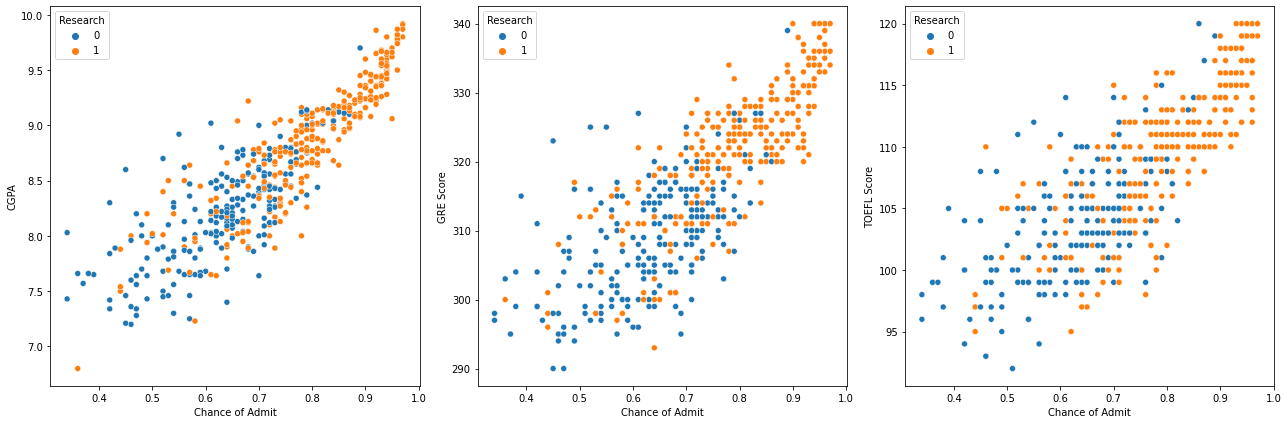

In [16]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.scatterplot(x=df['Chance of Admit'], y=df['CGPA'], hue=df['Research'])

plt.subplot(1,3,2)
sns.scatterplot(x=df['Chance of Admit'], y=df['GRE Score'], hue=df['Research'])

plt.subplot(1,3,3)
sns.scatterplot(x=df['Chance of Admit'], y=df['TOEFL Score'], hue=df['Research'])

plt.tight_layout()
plt.show()

- Students with higher CGPA has higher chance of admit scores.
- Students with higher GRE scores has higher chance of admit scores.
- Students with higher TOEFL scores has higher chance of admit scores.
- Students who has research experience has higher chance of admit in all the above scenarios with some exceptions.

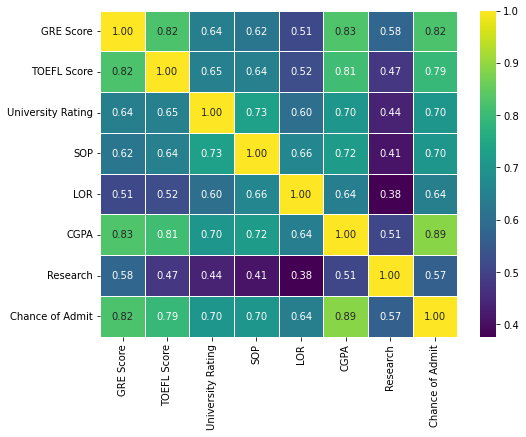

In [17]:
plt.figure(figsize=(8,6))
correlation_matrix= df.corr(method= 'spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)

plt.show()

- There is high correlation among GRE score, TOEFL score, CGPA and chance of admit. Same has been observed in the above scatter plots.

### Outlier detection

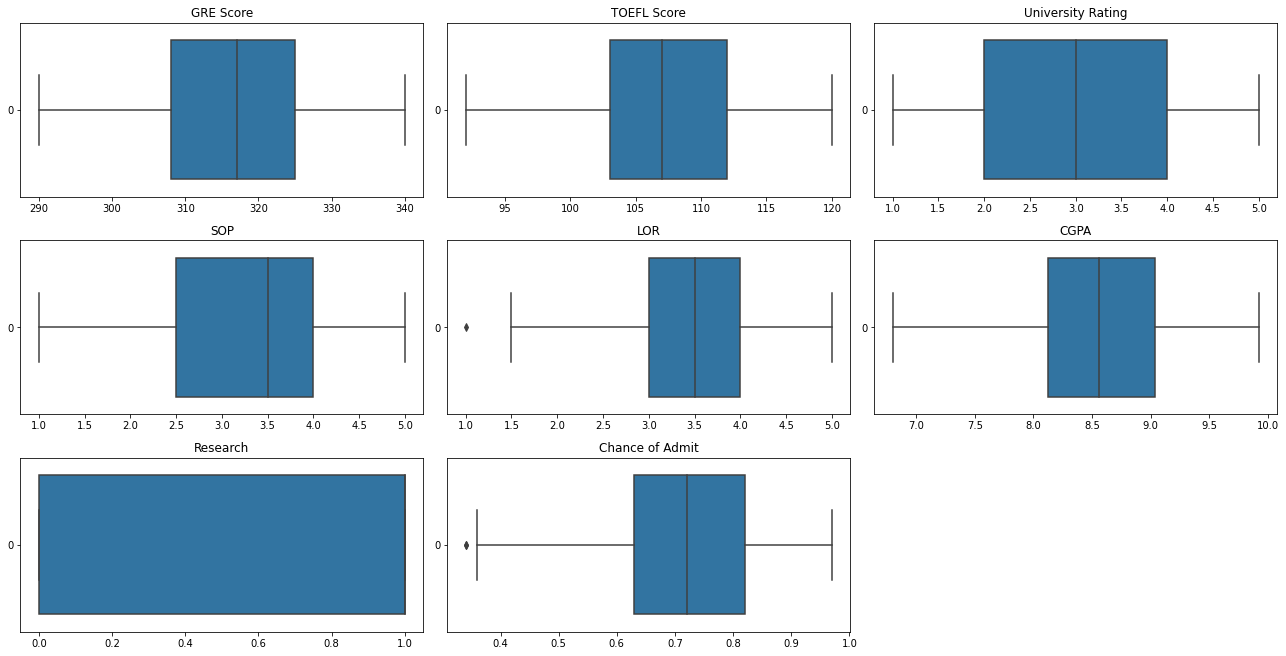

In [18]:
plt.figure(figsize=(18, 12))
for idx, i in enumerate(df.columns):
    plt.subplot(4, 3, idx+1)
    sns.boxplot(df[i], orient='h')
    plt.title(f"{i}")
plt.tight_layout()
plt.show()

- There are no outliers in almost all the features. And there is very less number of outliers in LOR and Chance of admit features.
- As there are are only 500 datapoints, its better to not remove the outliers.

### Data preparation

In [19]:
# Importing train_test_split from sklearn

from sklearn.model_selection import train_test_split

In [20]:
X = df.drop('Chance of Admit', axis=1)
y=df['Chance of Admit']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape, X_test.shape

((400, 7), (100, 7))

### Standardizing the columns using StandardScaler

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
X_train_col = X_train.columns
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train= pd.DataFrame(X_train_scaled,columns=X_train_col)

In [26]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
1,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
2,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
3,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
4,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434
...,...,...,...,...,...,...,...
395,1.120212,0.602418,0.775459,1.141162,1.108237,0.997792,0.895434
396,-0.979187,-0.383805,-0.972054,-0.887570,-0.521524,-0.600673,0.895434
397,-1.344300,-1.370029,-1.845810,-1.394754,-1.608031,-2.215790,-1.116777
398,-0.705353,-0.383805,-0.972054,-0.887570,0.564984,-1.499810,-1.116777


- Let's create different linear regression models using different libraries.

### Linear Regression using sklearn

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
# Create a linear regression model
linear_regression_model = LinearRegression()

# Train the model
linear_regression_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test_scaled)

# Calculating the root mean squared error
rmse_sklearn = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse_sklearn)

# Printing the coefficients and intercept
print("Coefficients:", linear_regression_model.coef_)
print("Intercept:", linear_regression_model.intercept_)

Root Mean Squared Error: 0.06086588041578313
Coefficients: [0.02667052 0.01822633 0.00293995 0.001788   0.0158655  0.06758106
 0.01194049]
Intercept: 0.7241749999999999


#### Lasso Regression

In [29]:
from sklearn.model_selection import  GridSearchCV

# Define a range of alpha values to search
alphas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]

# Create a Lasso regression model
lasso_model = Lasso()

# Perform grid search for hyperparameter tuning
lasso_grid = GridSearchCV(lasso_model, {'alpha': alphas}, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train_scaled, y_train)

# finding the best alpha from the grid search
best_alpha = lasso_grid.best_params_['alpha']
print("Best alpha = ", best_alpha)

# Create a Lasso regression model with the best alpha
lasso_model_best = Lasso(alpha=best_alpha)

# Train the model
lasso_model_best.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = lasso_model_best.predict(X_test_scaled)

# Calculate the root mean squared error
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error with Lasso:", rmse_lasso)

# Printing the coefficients
print("Coefficients with Lasso:", lasso_model_best.coef_)


Best alpha =  0.001
Root Mean Squared Error with Lasso: 0.06080880892435433
Coefficients with Lasso: [0.02661236 0.01791855 0.00274603 0.00159205 0.01539165 0.06773355
 0.01135986]


#### Ridge Regression

In [30]:
# Defining a range of alpha values to search
alphas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]

# Create a Ridge regression model
ridge_model = Ridge()

# Perform grid search for hyperparameter tuning
ridge_grid = GridSearchCV(ridge_model, {'alpha': alphas}, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train_scaled, y_train)

# finding the best alpha from the grid search
best_alpha_ridge = ridge_grid.best_params_['alpha']
print("Best alpha for Ridge = ", best_alpha_ridge)

# Create a Ridge regression model with the best alpha
ridge_model_best = Ridge(alpha=best_alpha_ridge)

# Train the model
ridge_model_best.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_ridge = ridge_model_best.predict(X_test_scaled)

# Calculate the root mean squared error
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Root Mean Squared Error with Ridge:", rmse_ridge)

# Printing the coefficients
print("Coefficients with Ridge:", ridge_model_best.coef_)


Best alpha for Ridge =  5
Root Mean Squared Error with Ridge: 0.06091257558687257
Coefficients with Ridge: [0.02720195 0.01883117 0.00345373 0.00250112 0.01598587 0.06488068
 0.01198843]


### Linear Regression using Statsmodel library

In [31]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)   #adding a constant

model = sm.OLS(y_train.values, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Thu, 11 Jan 2024   Prob (F-statistic):          3.41e-142
Time:                        18:54:26   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

- R-squared values ranges from 0 to 1. It reflects the fit of the model. The R-squared and adjusted R-squared values in the above model summary is already a good enough value.
- Coef in the above summary denotes the weights of respective features.
- The standard error(std err) is a measure of the variability or precision of the coefficient estimates in linear regression model. Lower the std err value higher the accuracy.
- Null hypothesis is that coef is zero. P>|t| gives the probability value at that t-test statistic. If the P value < 0.05, then it denotes that the respective coeff is not zero.
- The summary also provides the limits of 95% confidence interval of each feature.

- In all the above probability values, SOP and university rating has higher P values i.e., greater than 0.05.
- Let's drop the SOP column (highest P-value) and train the model again.

In [32]:
X_train_updated = X_train.drop('SOP', axis=1)

In [33]:
# Training the model on the updated dataset

model_updated = sm.OLS(y_train.values, X_train_updated).fit()
print(model_updated.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     300.4
Date:                Thu, 11 Jan 2024   Prob (F-statistic):          2.01e-143
Time:                        18:54:26   Log-Likelihood:                 561.85
No. Observations:                 400   AIC:                            -1110.
Df Residuals:                     393   BIC:                            -1082.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

- There is no decrease in R^2 and Adj R^2 scores after dropping SOP feature.
- But University rating feature still has higher P value i.e., greater than 0.05. So, let's remove it and re-train the model on the updated dataset.

In [34]:
X_train_updated_2 = X_train_updated.drop('University Rating', axis=1)

In [35]:
# Training the model on the updated dataset

model_updated_2 = sm.OLS(y_train.values, X_train_updated_2).fit()
print(model_updated_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Thu, 11 Jan 2024   Prob (F-statistic):          1.36e-144
Time:                        18:54:26   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7242      0.003    241.830      

- All the VIF scores are less than 10 i.e., generally accepted VIF score. So, dont need to drop anymore features.

### Model Evaluation

In [36]:
# Transforming the test dataset

X_test_scaled= scaler.transform(X_test)

In [37]:
# Converting the transformed X_test array into a dataframe.

X_test= pd.DataFrame(X_test_scaled,columns=X_train_col)

In [38]:
X_test = sm.add_constant(X_test)   #adding a constant to test set

In [39]:
# Dropping the features same as the ones in training dataset.
X_test_updated = X_test.drop(['SOP'], axis=1)

In [40]:
X_test_updated_2 = X_test_updated.drop(['University Rating'], axis=1)

In [41]:
X_test_updated_2

,const,GRE Score,TOEFL Score,LOR,CGPA,Research
0,1.0,1.576604,1.424271,0.021730,1.597217,0.895434
1,1.0,-0.248961,0.109306,0.564984,0.764683,0.895434
2,1.0,-0.157683,-0.383805,-1.064777,-1.549762,-1.116777
3,1.0,-0.431518,0.273677,-0.521524,0.181909,-1.116777
4,1.0,0.846378,0.766789,-0.521524,0.781333,0.895434
...,...,...,...,...,...,...
95,1.0,-1.618135,-2.191882,-2.694538,-2.065934,-1.116777
96,1.0,-0.157683,-0.219435,0.021730,-0.267660,-1.116777
97,1.0,1.120212,1.095530,0.564984,-0.034550,0.895434
98,1.0,0.116152,0.438048,0.021730,-0.067852,0.895434


In [42]:
# calculating prediction on test dataset using the final model.
pred = model_updated_2.predict(X_test_updated_2)
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Calculating different types of errors to evaluate the model.
print('Mean Absolute Error:', mean_absolute_error(y_test.values, pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test.values, pred)))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test.values, pred))

Mean Absolute Error: 0.04292345578265779
Root Mean Square Error: 0.06142491974041882
Mean Absolute Percentage Error: 0.06872435658389969


- The model exhibits strong performance based on the above evaluation metrics. 
- The Mean Absolute Error (MAE) of 0.0429 indicates that, on average, the model's predictions deviate by approximately 0.0429 units from the true values.
- The Root Mean Square Error (RMSE) of 0.0614 suggests that the model is effective in minimizing the impact of larger errors, contributing to overall precision. 
- Additionally, the Mean Absolute Percentage Error (MAPE) of 0.0687, expressed as a percentage, implies that, on average, the model's predictions have an error of around 6.87%

## Assumptions of Linear Regression

### Multicollinearity using VIF(Variance Inflation Factor)

- VIF score of an independent variable represents how well the variable is explained by other independent variables.
- So, the closer the R-squared value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
# Creating a function to calculate VIF for all the columns

def calc_vif(X):
    # Calculating the VIF
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [45]:
calc_vif(X_train_updated_2)

,Feature,VIF
1,GRE Score,4.47
4,CGPA,4.28
2,TOEFL Score,3.54
3,LOR,1.66
5,Research,1.50
0,const,1.00


### Mean of Residuals

In [46]:
residuals = y_test.values - pred
residual_mean = np.mean(residuals)

print("Mean of Residuals:", residual_mean)

Mean of Residuals: -0.005305947942349209


- The above negative mean of residuals indicates that our final model is slightly under-estimating the true values. 

### Normality of Residuals

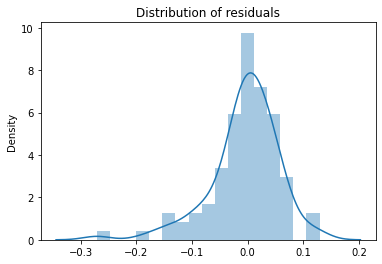

In [47]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Distribution of residuals')

- Residuals seems to be of normally distributed with a little left skewed.

### Test for Homoscedasticity

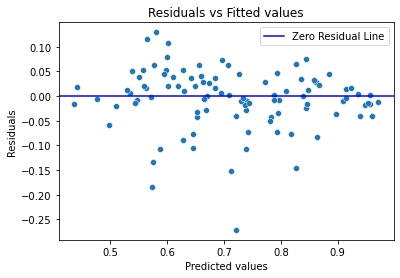

In [48]:
p = sns.scatterplot(x=pred, y=residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='blue', linestyle='-', label='Zero Residual Line')
plt.title('Residuals vs Fitted values')
plt.legend()
plt.show()

- There seems to be very slight difference in variances.
- Will have to test it using statistical method to prove whether the data is homoskedastic or not.

#### Breusch-Pagan Test:

In [49]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.compat import lzip

bp_test = het_breuschpagan(residuals, X_test_updated_2)
lzip(['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value'], bp_test)


[('LM Statistic', 4.700770230590468),
 ('LM-Test p-value', 0.45347827628687),
 ('F-Statistic', 0.9273367743783012),
 ('F-Test p-value', 0.46695219620274264)]

- The p-values for both the LM-Test and F-Test are relatively high, around 0.45 and 0.47, respectively.
- Based on common significance levels (e.g., 0.05), these p-values indicate that there is not enough evidence to reject the null hypothesis of homoskedasticity.
- Therefore, the results suggest that, statistically, there is no significant violation of homoskedasticity.

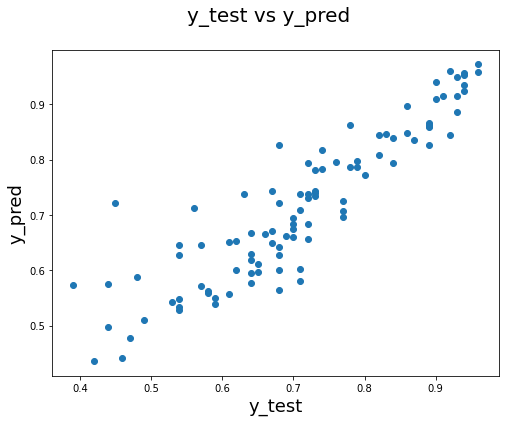

In [50]:
fig = plt.figure(figsize=(8,6))
plt.scatter(y_test.values, pred)
fig.suptitle('y_test vs y_pred', fontsize=20) # Plot head
plt.xlabel('y_test', fontsize=18) # X-label
plt.ylabel('y_pred', fontsize=18)
plt.show()

- At higher Chance of admit scores the model seems to have less bias. So, it is able to predict more accurately at higher chance of admits.

- Model is producing more errors at lower chance of admits. 

- The more preferred model is one with low bias and low varinace.
- Errors can be reduced by getting more data of lower chance of admits, so that model can learn better.
- Add needed features/dimensions or do feature engineering to create reliable features to make the model a little complex to decrease the bias.
- A bigger training dataset can decrease the variance in predictions.